In [6]:
# These commands set up the notebook plotting interface, so no need to modify
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


[]

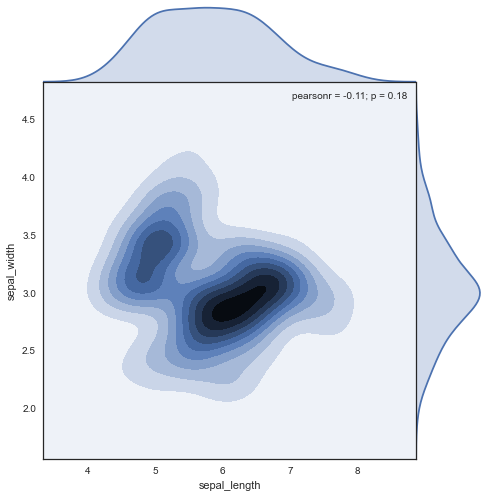

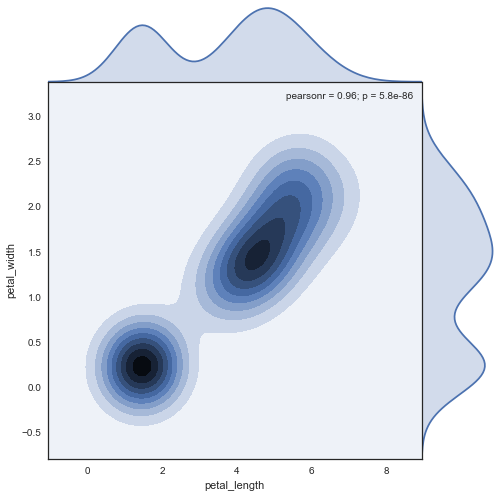

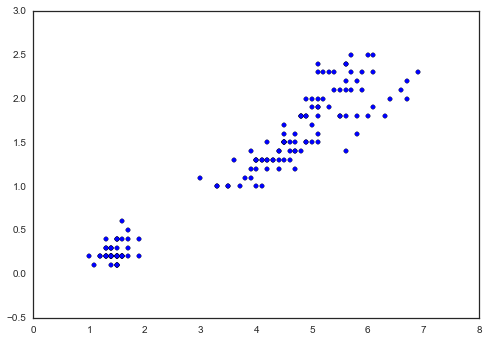

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")

df = pd.DataFrame.from_csv('datasets/iris_data.csv', index_col=4)


sepal_plot = sns.jointplot(df['sepal_length'],df['sepal_width'], kind='kde', size=7, space=0)
petal_plot = sns.jointplot(df['petal_length'],df['petal_width'], kind='kde', size=7, space=0)
